# Dataset Haqqında

This dataset contains the final scores of students at the end of a math programs with several features that might or might not impact the future outcome of these students.

**Atribut Məlumatı:**

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

Dataseti Təmizləmək



In [2]:
#kitabxanalari yuklemek
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [3]:
#dataseti oxumaq

df = pd.read_csv('/content/student-mat.csv')

# İlk 5 sətrə bax
df.head()




,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [4]:
#dataseti oxumaq

df = pd.read_csv('/content/student-mat.csv', sep = ";")

# İlk 5 sətrə bax
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
# Məlumat tipi və sütunlara baxış
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
#null deyerler check
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [8]:
#Dublikatlarin yoxlanilmasi
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
390,False
391,False
392,False
393,False


In [9]:
df.columns



Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
duplicates = df.duplicated()

# Neçə dublikat sətr var?
duplicates.sum()

#hansı sətrlər dublikatdir
df[duplicates]


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [11]:
df['school'].value_counts()

,count
school,
GP,349
MS,46


In [12]:
df['Pstatus'].value_counts()

,count
Pstatus,
T,354
A,41


In [13]:
df['sex'].value_counts()

,count
sex,
F,208
M,187


In [14]:
df['internet'].value_counts()

,count
internet,
yes,329
no,66


In [15]:
df['higher'].value_counts()

,count
higher,
yes,375
no,20


In [16]:
# Outliers sayini tapmaq
#eded sütunları seç
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_summary[col] = len(outliers)

#çap et
for col, count in outlier_summary.items():
    if count > 0:
        print(f"'{col}' sütununda {count} ədəd outlier var.")


'age' sütununda 1 ədəd outlier var.
'Fedu' sütununda 2 ədəd outlier var.
'traveltime' sütununda 8 ədəd outlier var.
'studytime' sütununda 27 ədəd outlier var.
'failures' sütununda 83 ədəd outlier var.
'famrel' sütununda 26 ədəd outlier var.
'freetime' sütununda 19 ədəd outlier var.
'Dalc' sütununda 18 ədəd outlier var.
'absences' sütununda 15 ədəd outlier var.
'G2' sütununda 13 ədəd outlier var.


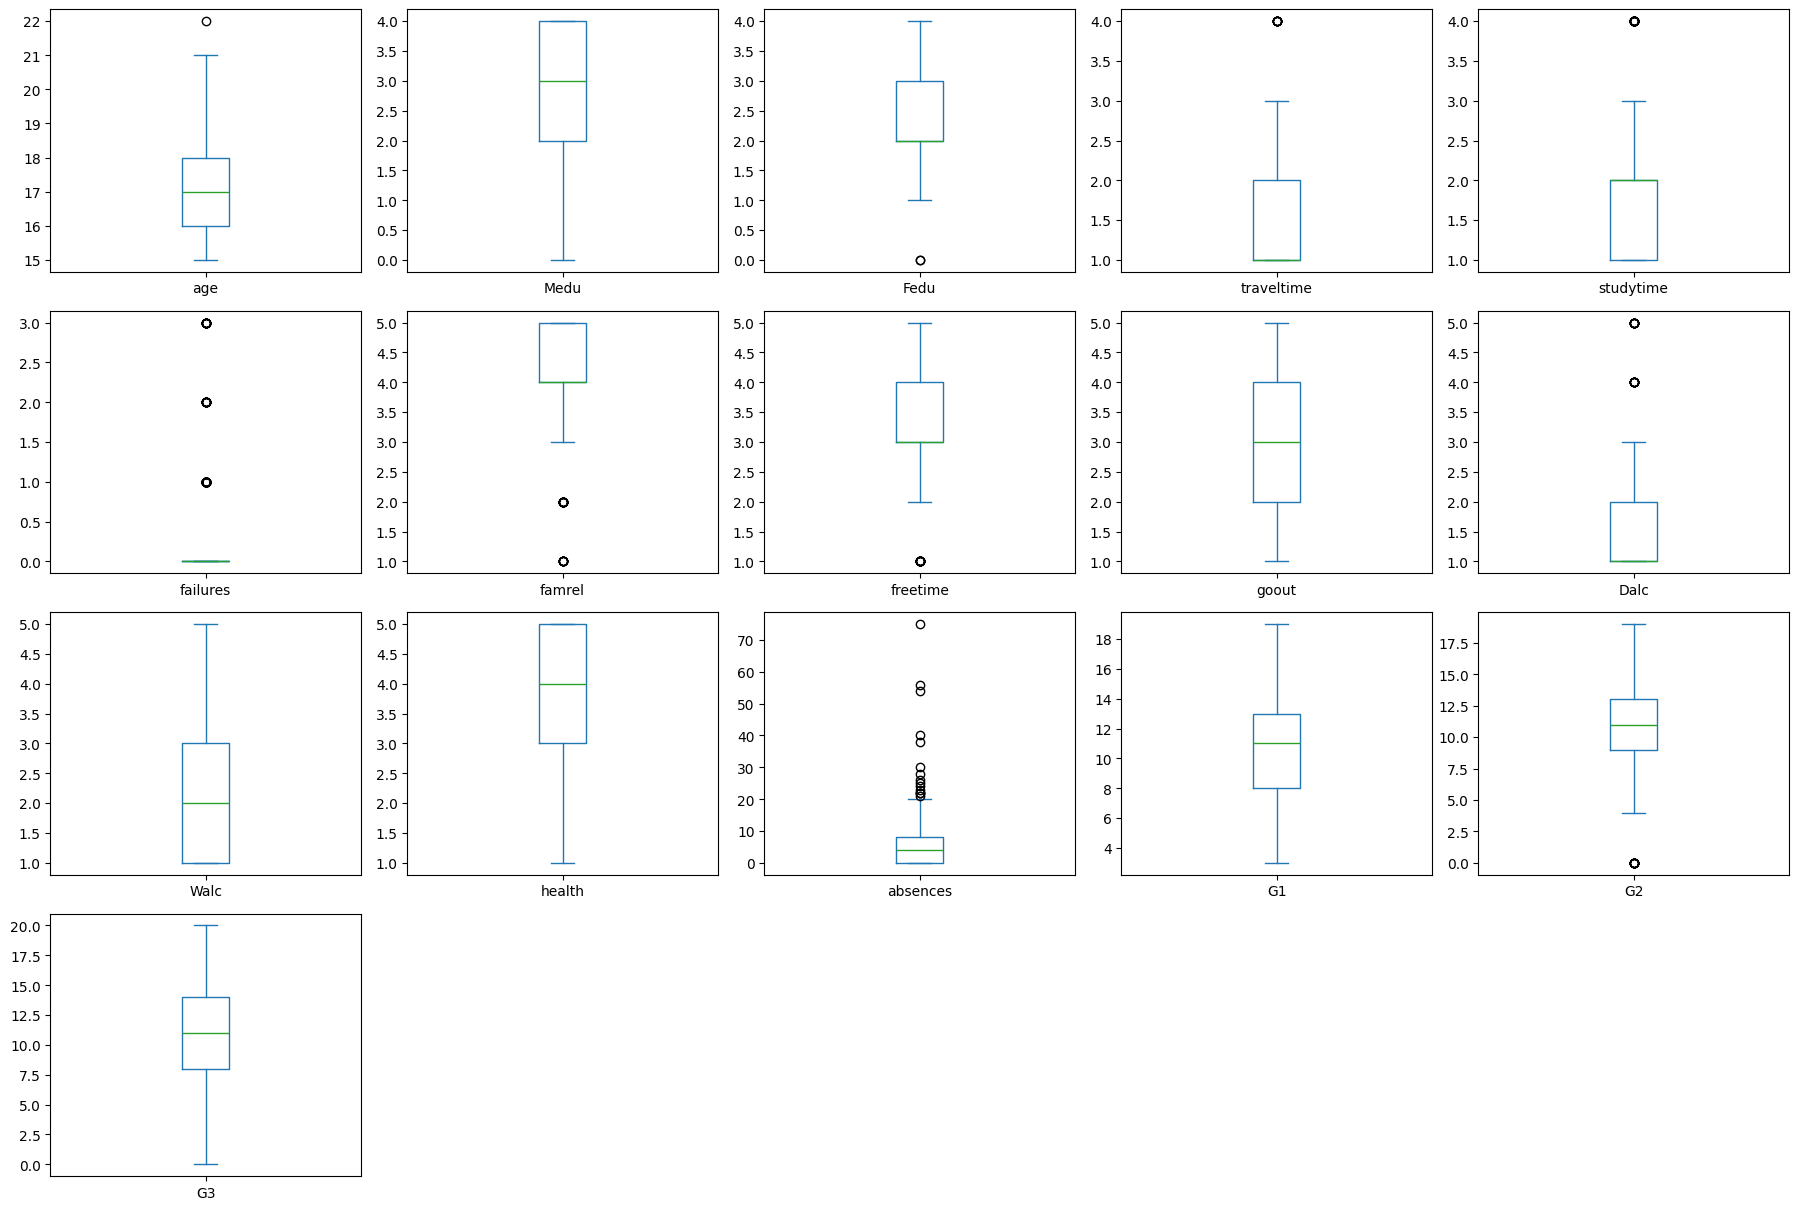

In [17]:

# Ededli sütunlar üçün boxplot
df[numeric_cols].plot(kind='box', subplots=True, layout=(6, 5), figsize=(18, 18), sharex=False, sharey=False)
plt.tight_layout()
plt.show()



In [18]:
# Outliers yoxlamaq
# 1. Fedu — Atanın təhsili (normal aralığı: 0-4)
print("Fedu dəyərləri:")
print(df['Fedu'].value_counts())
print("Uyğunsuz dəyərlər (Fedu > 4):")
print(df[df['Fedu'] > 4]['Fedu'])

# 2. traveltime — Məktəbə getmək vaxtı (1–4)
print("\ntraveltime dəyərləri:")
print(df['traveltime'].value_counts())
print("Uyğunsuz dəyərlər (traveltime > 4):")
print(df[df['traveltime'] > 4]['traveltime'])

# 3. studytime — Dərsə sərf olunan vaxt (1–4)
print("\nstudytime dəyərləri:")
print(df['studytime'].value_counts())
print("Uyğunsuz dəyərlər (studytime > 4):")
print(df[df['studytime'] > 4]['studytime'])

# 4. failures — Təkrar dərslər (0–3)
print("\nfailures dəyərləri:")
print(df['failures'].value_counts())
print("Uyğunsuz dəyərlər (failures > 3):")
print(df[df['failures'] > 3]['failures'])

# 5. absences — Dərs buraxmaları (dəyişkəndir)
print("\nabsences statistikası:")
print(df['absences'].describe())
print("Çox yüksək dəyərlər (outlier ola biləcək):")
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
print(df[df['absences'] > upper]['absences'])

# 6. G2 — 2-ci qiymət (0–20)
print("\nG2 dəyərləri:")
print(df['G2'].describe())
print("Uyğunsuz dəyərlər (G2 < 0 və ya > 20):")
print(df[(df['G2'] < 0) | (df['G2'] > 20)]['G2'])


Fedu dəyərləri:
Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64
Uyğunsuz dəyərlər (Fedu > 4):
Series([], Name: Fedu, dtype: int64)

traveltime dəyərləri:
traveltime
1    257
2    107
3     23
4      8
Name: count, dtype: int64
Uyğunsuz dəyərlər (traveltime > 4):
Series([], Name: traveltime, dtype: int64)

studytime dəyərləri:
studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64
Uyğunsuz dəyərlər (studytime > 4):
Series([], Name: studytime, dtype: int64)

failures dəyərləri:
failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64
Uyğunsuz dəyərlər (failures > 3):
Series([], Name: failures, dtype: int64)

absences statistikası:
count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64
Çox yüksək dəyərlər (outlier ola biləcək):
40     25
74     54
103    26
183    56
198    24
205    28
216    22


In [19]:
#Outliers silmek

# IQR əsaslı outlier limitini hesabla
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR

# Outlier-ləri sil (yəni, absences > upper olan sətrləri çıxar)
df = df[df['absences'] <= upper]


# EDA

In [20]:
df['Medu'].value_counts()

,count
Medu,
4,124
2,101
3,93
1,59
0,3


In [21]:
df['studytime'].value_counts()

,count
studytime,
2,189
1,101
3,63
4,27


In [22]:
df['failures'].value_counts()


,count
failures,
0,304
1,44
3,16
2,16


In [23]:
df['Pstatus'].value_counts()



,count
Pstatus,
T,342
A,38


In [24]:
# Cinsə, internetə, ananın təhsilinə, studytime, failures görə orta G3
print(df.groupby('sex')['G3'].mean())
print(df.groupby('internet')['G3'].mean())
print(df.groupby('Medu')['G3'].mean())
print(df.groupby('studytime')['G3'].mean())
print(df.groupby('failures')['G3'].mean())
print(df.groupby('schoolsup')['G3'].mean())
print(df.groupby('famsup')['G3'].mean())
print(df.groupby('romantic')['G3'].mean())
print(df.groupby('health')['G3'].mean())
print(df.groupby('absences')['G3'].mean())


sex
F     9.918367
M    10.956522
Name: G3, dtype: float64
internet
no      9.409091
yes    10.633758
Name: G3, dtype: float64
Medu
0    13.000000
1     8.677966
2     9.702970
3    10.387097
4    11.798387
Name: G3, dtype: float64
studytime
1    10.019802
2    10.174603
3    11.444444
4    11.259259
Name: G3, dtype: float64
failures
0    11.279605
1     7.681818
2     6.375000
3     5.687500
Name: G3, dtype: float64
schoolsup
no     10.561934
yes     9.469388
Name: G3, dtype: float64
famsup
no     10.722973
yes    10.228448
Name: G3, dtype: float64
romantic
no     10.833977
yes     9.537190
Name: G3, dtype: float64
health
1    12.159091
2     9.952381
3    10.000000
4    10.138462
5    10.411348
Name: G3, dtype: float64
absences
0      8.443478
1     13.000000
2     11.907692
3     11.500000
4     11.283019
5     11.600000
6     11.774194
7     11.857143
8     10.590909
9     13.333333
10    11.235294
11    11.666667
12    10.750000
13    12.666667
14     9.333333
15     8.333333
16  

In [25]:
correlation = df.corr(numeric_only=True)
print(correlation['G3'].sort_values(ascending=False))


G3            1.000000
G2            0.902882
G1            0.798394
Medu          0.221206
Fedu          0.151087
studytime     0.101594
absences      0.084467
famrel        0.052686
freetime      0.032148
Dalc         -0.052800
Walc         -0.053063
health       -0.063933
traveltime   -0.117953
goout        -0.122582
age          -0.171142
failures     -0.365408
Name: G3, dtype: float64


In [26]:
# Label Encoding
binary_cols = ['sex', 'address', 'famsize',  'schoolsup', 'famsup',
               'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Bütün binary sütunları 0/1 formatına çevir
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'F': 0, 'M': 1, 'U': 1, 'R': 0, 'GT3': 1, 'LE3': 0, })

/tmp/ipython-input-26-98070049.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'yes': 1, 'no': 0, 'F': 0, 'M': 1, 'U': 1, 'R': 0, 'GT3': 1, 'LE3': 0, })
/tmp/ipython-input-26-98070049.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'yes': 1, 'no': 0, 'F': 0, 'M': 1, 'U': 1, 'R': 0, 'GT3': 1, 'LE3': 0, })
/tmp/ipython-input-26-98070049.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

/tmp/ipython-input-27-479266028.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g3_corr.values, y=g3_corr.index, palette='coolwarm')


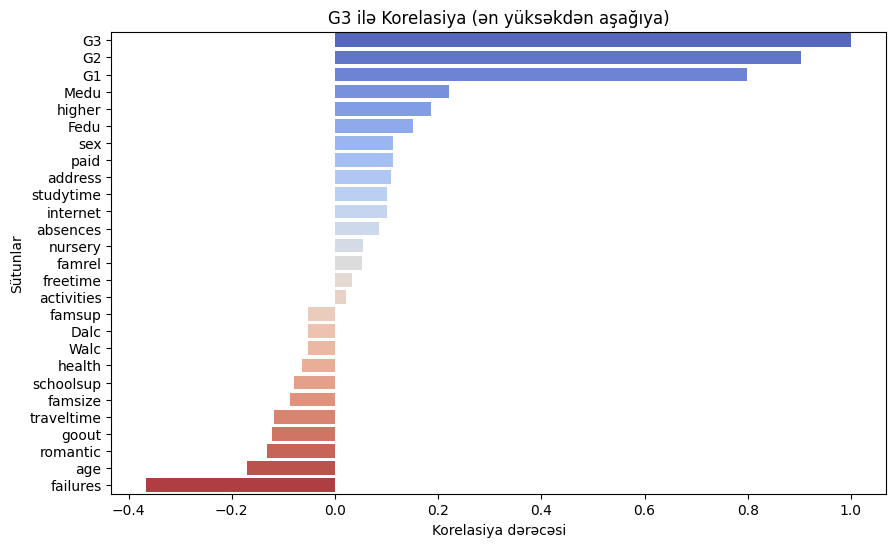

In [27]:

# Yalnız sayısal sütunları seç
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# G3 ilə bağlı korelasiya
g3_corr = numeric_df.corr()['G3'].sort_values(ascending=False)

# Barplot ilə göstər
plt.figure(figsize=(10, 6))
sns.barplot(x=g3_corr.values, y=g3_corr.index, palette='coolwarm')
plt.title('G3 ilə Korelasiya (ən yüksəkdən aşağıya)')
plt.xlabel('Korelasiya dərəcəsi')
plt.ylabel('Sütunlar')
plt.show()



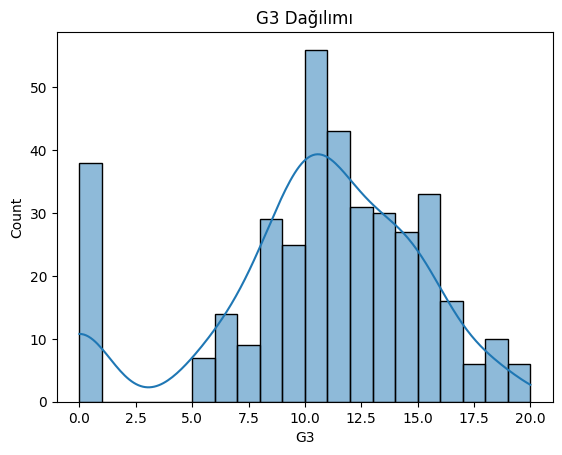

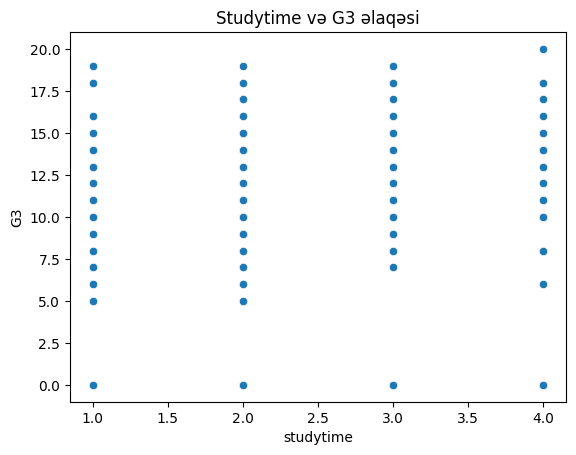

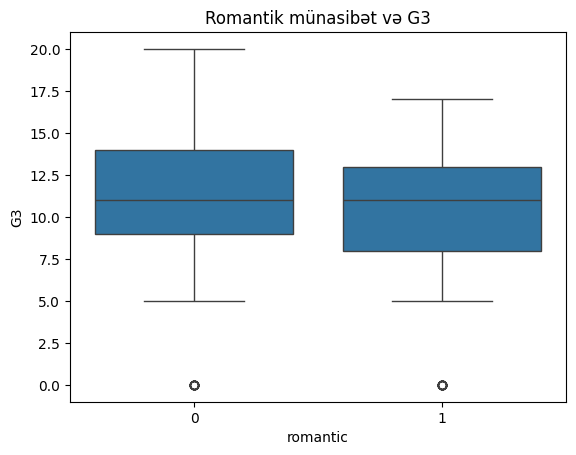

In [28]:

# G3 ilə əlaqəli sütunlar üçün histplot (dağılım)
sns.histplot(data=df, x='G3', bins=20, kde=True)
plt.title('G3 Dağılımı')
plt.show()

# Studytime və G3 arasında scatterplot
sns.scatterplot(data=df, x='studytime', y='G3')
plt.title("Studytime və G3 əlaqəsi")
plt.show()

# Boxplot ilə romantik münasibətlərin G3-ə təsiri
sns.boxplot(data=df, x='romantic', y='G3')
plt.title("Romantik münasibət və G3")
plt.show()


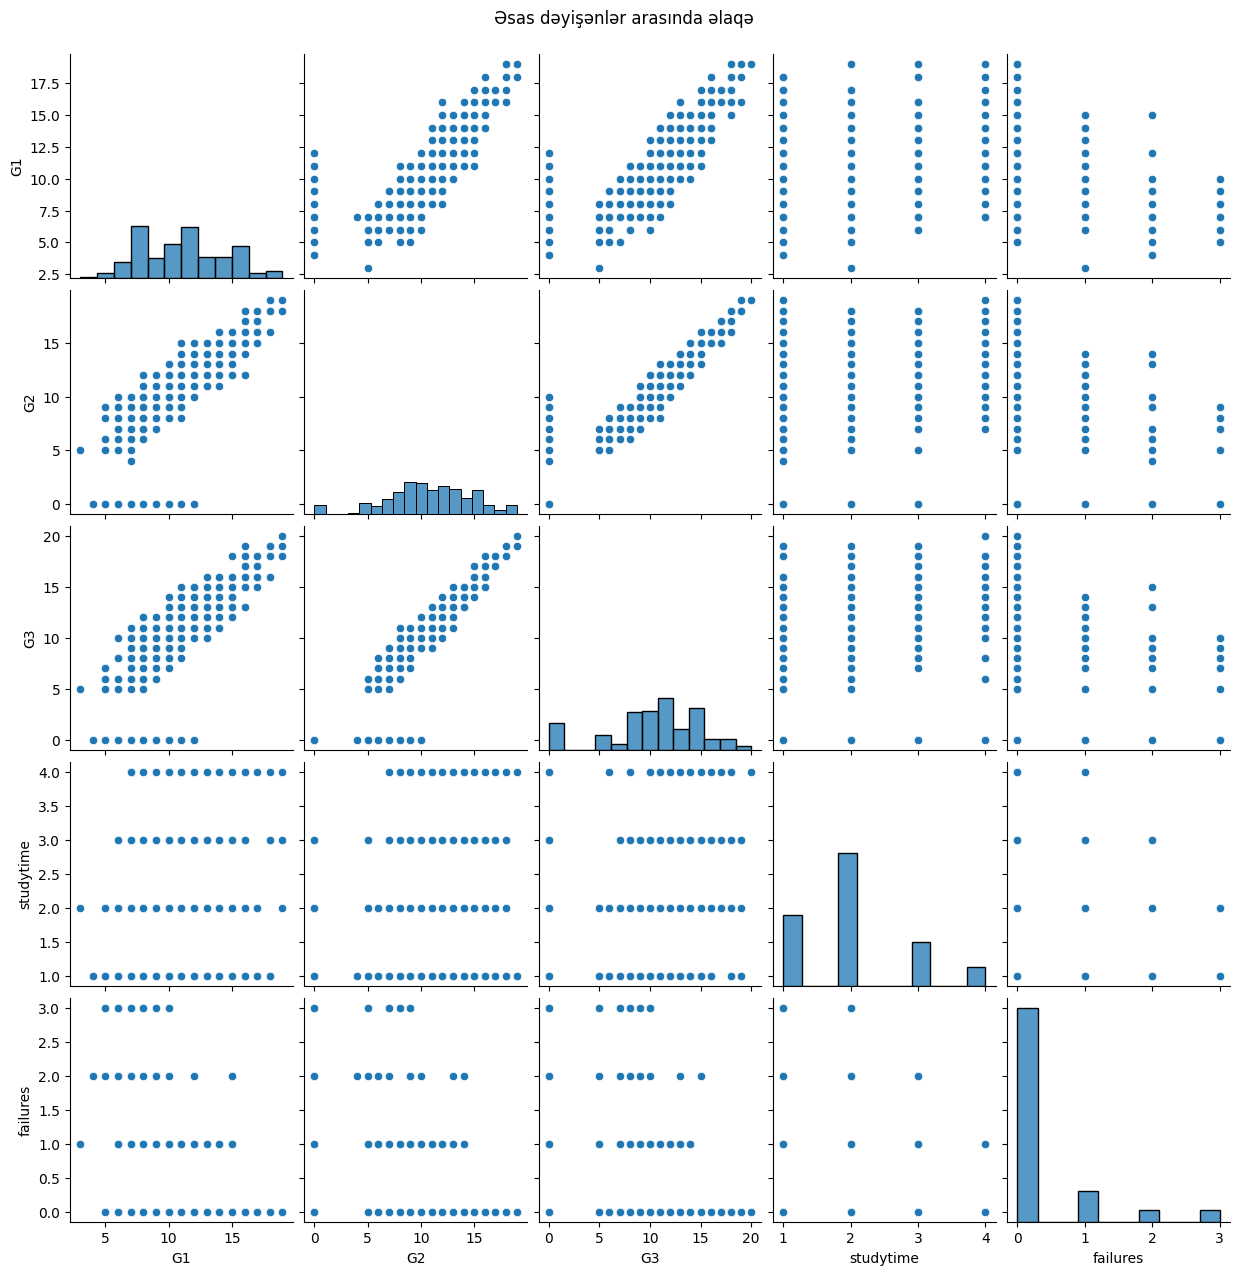

In [29]:
sns.pairplot(df[['G1', 'G2', 'G3', 'studytime', 'failures']])
plt.suptitle("Əsas dəyişənlər arasında əlaqə", y=1.02)
plt.show()


In [30]:
df['school'].unique()



array(['GP', 'MS'], dtype=object)

In [31]:
#df['school_encoded'] = df['school'].map({'GP': 1, 'MS': 0})
#print(df[['school_encoded', 'G3']].corr())


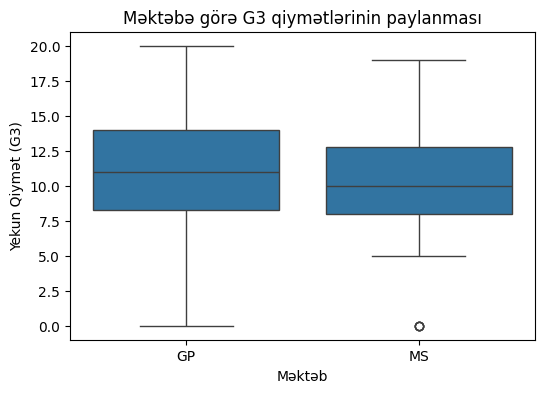

In [32]:

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='school', y='G3')
plt.title('Məktəbə görə G3 qiymətlərinin paylanması')
plt.xlabel('Məktəb')
plt.ylabel('Yekun Qiymət (G3)')
plt.show()


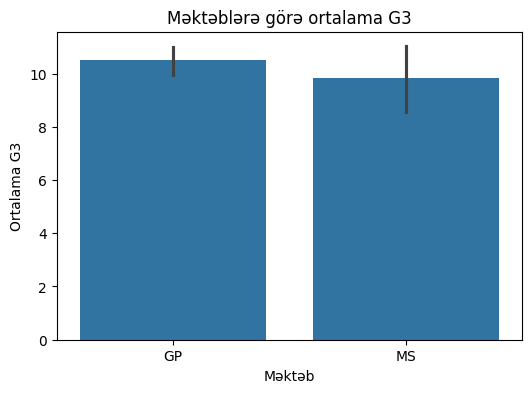

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='school', y='G3', estimator='mean')
plt.title('Məktəblərə görə ortalama G3')
plt.xlabel('Məktəb')
plt.ylabel('Ortalama G3')
plt.show()

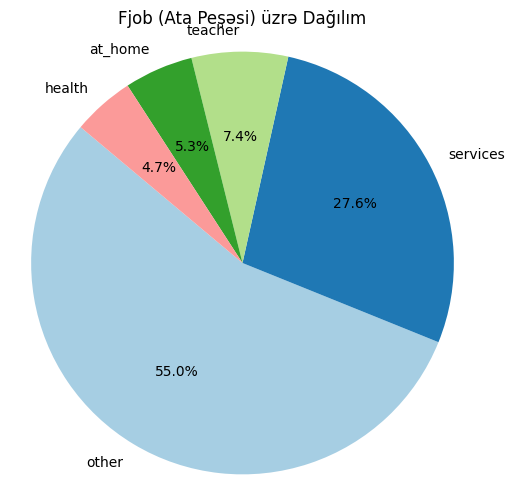

In [34]:
# Fjob sütunundakı dəyərlərin payı
fjob_counts = df['Fjob'].value_counts()

# Pie chart qur
plt.figure(figsize=(6, 6))
plt.pie(fjob_counts, labels=fjob_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Fjob (Ata Peşəsi) üzrə Dağılım")
plt.axis('equal')  # dairə formasında saxlamaq üçün
plt.show()

/tmp/ipython-input-35-3784850692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=df, palette='viridis')


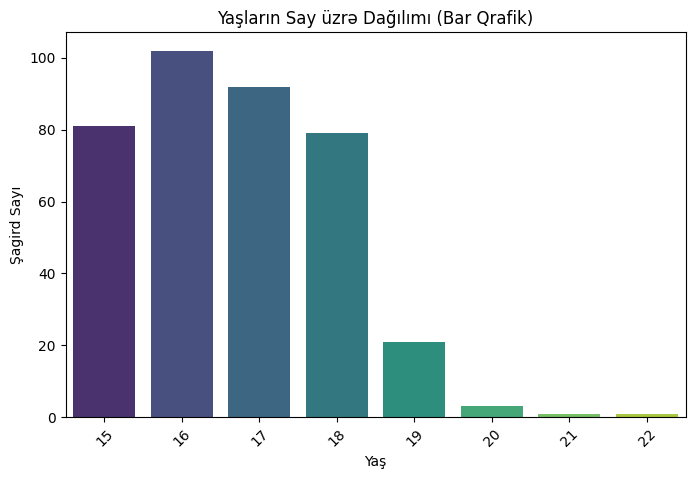

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(x='age', data=df, palette='viridis')
plt.title("Yaşların Say üzrə Dağılımı (Bar Qrafik)")
plt.xlabel("Yaş")
plt.ylabel("Şagird Sayı")
plt.xticks(rotation=45)
plt.show()

In [36]:
df['Pstatus'].unique()


array(['A', 'T'], dtype=object)

In [37]:
df.groupby('Pstatus')['G3'].mean()


,G3
Pstatus,
A,11.289474
T,10.324561


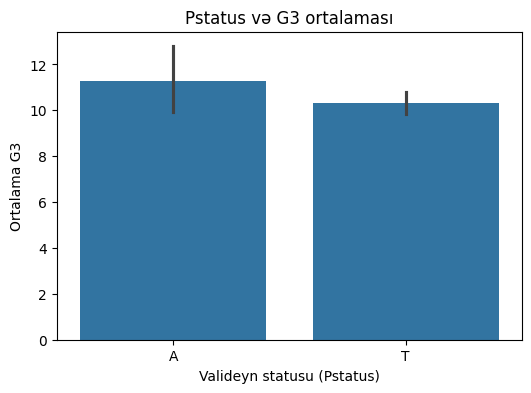

In [38]:

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Pstatus', y='G3', estimator='mean')
plt.title('Pstatus və G3 ortalaması')
plt.xlabel('Valideyn statusu (Pstatus)')
plt.ylabel('Ortalama G3')
plt.show()


In [39]:
df['higher'].value_counts()


,count
higher,
1,361
0,19


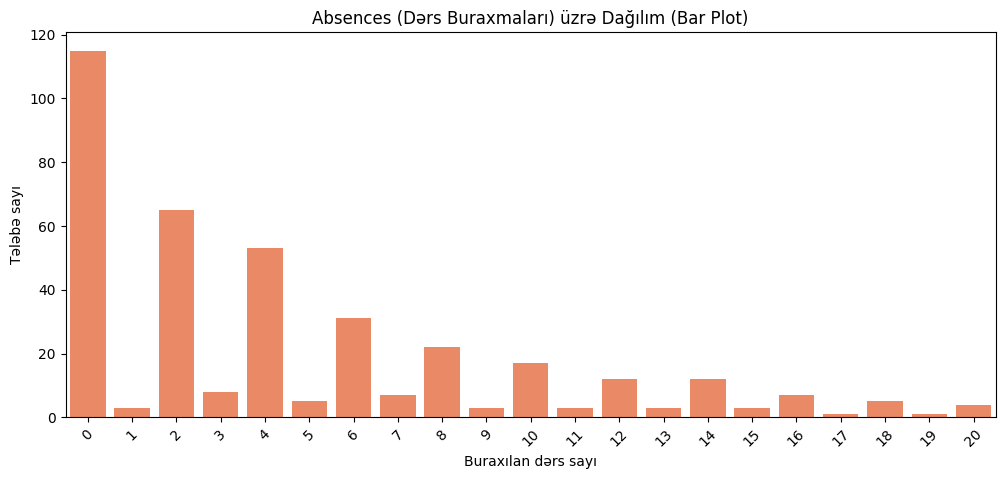

In [40]:
plt.figure(figsize=(12, 5))
sns.countplot(x='absences', data=df, color='coral')
plt.title("Absences (Dərs Buraxmaları) üzrə Dağılım (Bar Plot)")
plt.xlabel("Buraxılan dərs sayı")
plt.ylabel("Tələbə sayı")
plt.xticks(rotation=45)
plt.show()

# Nəticə olaraq:
G3-ə ən güclü təsir edənlər: G2, G1, failures, Medu, higher.

Müsbət təsir: Ana təhsili, çox oxumaq, ali təhsil istəyi.

Mənfi təsir: Uğursuzluqlar, yaş, romantik münasibət, çölə çıxmaq.

# Encoding


In [41]:
#LabelEncoder (ikili olanlar)

label_cols = [
    'sex', 'address', 'famsize', 'Pstatus',
    'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet', 'romantic'
]

# Label encoding
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [42]:
#One-hot Encoding (çox kateqoriyalılar)

one_hot_cols = ['school', 'Mjob', 'Fjob', 'reason', 'guardian']

# get_dummies tətbiq et və əsas DataFrame ilə birləşdir
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


In [43]:
df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,18,1,1,0,4,4,2,2,0,...,False,False,False,False,True,False,False,False,True,False
1,0,17,1,1,1,1,1,1,2,0,...,False,False,True,False,False,False,False,False,False,False
2,0,15,1,0,1,1,1,1,2,3,...,False,False,True,False,False,False,True,False,True,False
3,0,15,1,1,1,4,2,1,3,0,...,False,False,False,True,False,True,False,False,True,False
4,0,16,1,1,1,3,3,1,2,0,...,False,False,True,False,False,True,False,False,False,False


In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                380 non-null    int64
 1   age                380 non-null    int64
 2   address            380 non-null    int64
 3   famsize            380 non-null    int64
 4   Pstatus            380 non-null    int64
 5   Medu               380 non-null    int64
 6   Fedu               380 non-null    int64
 7   traveltime         380 non-null    int64
 8   studytime          380 non-null    int64
 9   failures           380 non-null    int64
 10  schoolsup          380 non-null    int64
 11  famsup             380 non-null    int64
 12  paid               380 non-null    int64
 13  activities         380 non-null    int64
 14  nursery            380 non-null    int64
 15  higher             380 non-null    int64
 16  internet           380 non-null    int64
 17  romantic           38

Scaler qərar vermək üçün ədədi sütunların paylanmasına baxaq

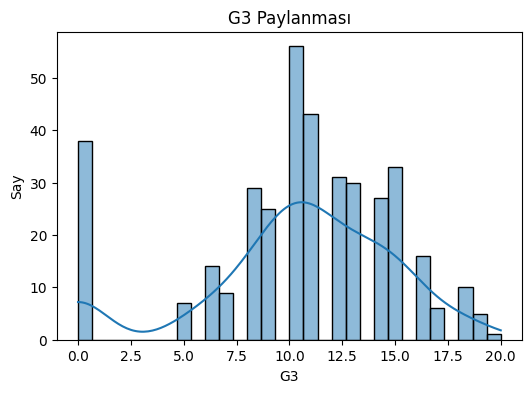

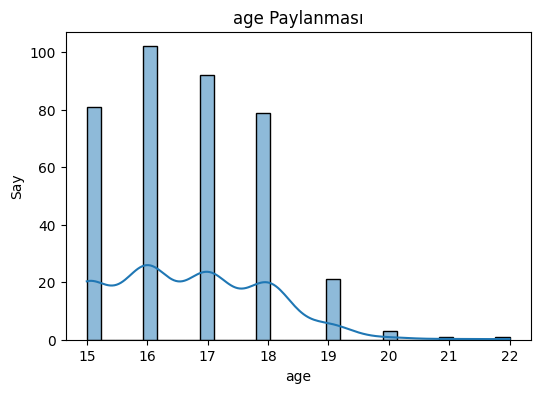

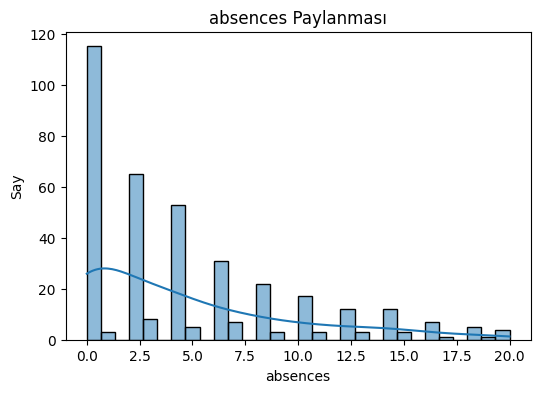

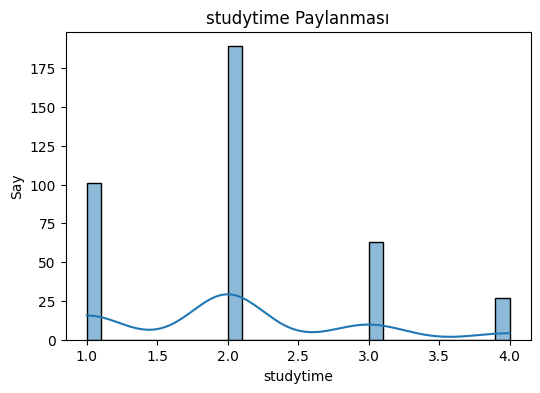

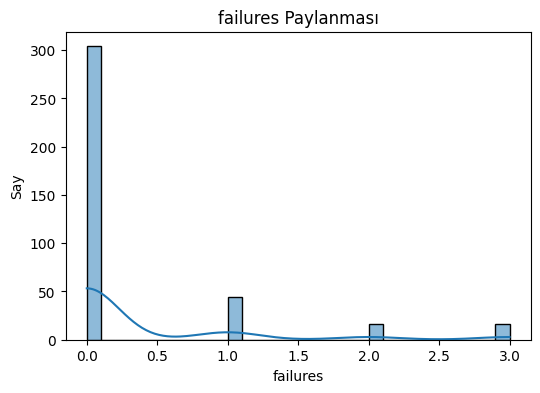

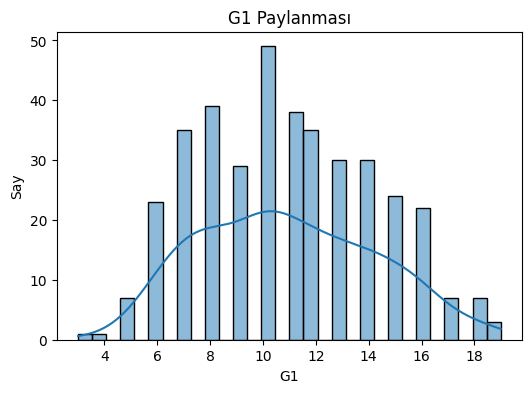

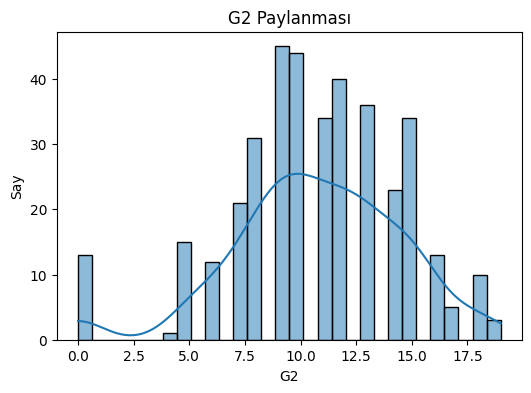

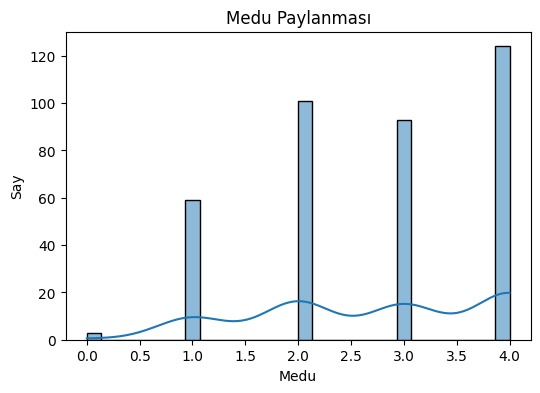

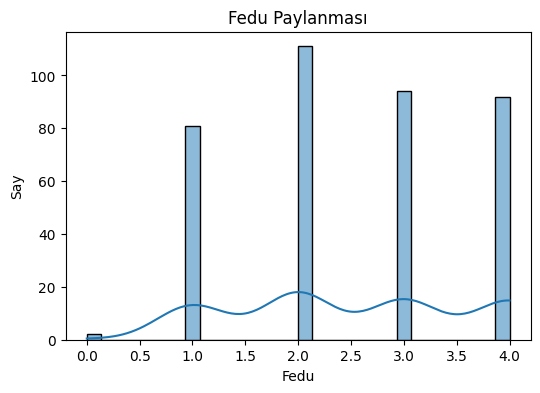

In [45]:
num_cols = ['G3', 'age', 'absences', 'studytime', 'failures', 'G1', 'G2', 'Medu', 'Fedu']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Paylanması')
    plt.xlabel(col)
    plt.ylabel("Say")
    plt.show()

# Normalizasiya və Standardizasiya Tətbiqi
Ədədi sütunlara transformasiya:

StandardScaler tətbiq olunan sütunlar (çünki paylanmaları normaldır):

G1, G2, G3

MinMaxScaler tətbiq olunan sütunlar (çünki skewed paylanmaya malikdir):

age, absences

In [46]:
#Scaler tədbiqi
df_scaled = df.copy()

# StandardScaler — G1, G2, G3 üçün
standard_scaler = StandardScaler()
df_scaled[['G1', 'G2', 'G3']] = standard_scaler.fit_transform(df_scaled[['G1', 'G2', 'G3']])

# MinMaxScaler — age, absences üçün
minmax_scaler = MinMaxScaler()
df_scaled[['age', 'absences']] = minmax_scaler.fit_transform(df_scaled[['age', 'absences']])


In [47]:
# Əvvəlki və yeni statistikalar
print("Əvvəl:")
print(df[['G1', 'G2', 'G3', 'age', 'absences']].describe())

print("\nTətbiq olunduqdan sonra:")
print(df_scaled[['G1', 'G2', 'G3', 'age', 'absences']].describe())


Əvvəl:
               G1          G2          G3         age    absences
count  380.000000  380.000000  380.000000  380.000000  380.000000
mean    10.921053   10.723684   10.421053   16.671053    4.602632
std      3.312896    3.772553    4.612313    1.274762    4.968236
min      3.000000    0.000000    0.000000   15.000000    0.000000
25%      8.000000    9.000000    8.000000   16.000000    0.000000
50%     11.000000   11.000000   11.000000   17.000000    3.000000
75%     13.000000   13.000000   14.000000   18.000000    7.000000
max     19.000000   19.000000   20.000000   22.000000   20.000000

Tətbiq olunduqdan sonra:
                 G1            G2            G3         age    absences
count  3.800000e+02  3.800000e+02  3.800000e+02  380.000000  380.000000
mean   1.168656e-16  1.799730e-16  7.479397e-17    0.238722    0.230132
std    1.001318e+00  1.001318e+00  1.001318e+00    0.182109    0.248412
min   -2.394127e+00 -2.846301e+00 -2.262377e+00    0.000000    0.000000
25%   -8.8288

# Dataset Dəyişiklikləri:
Əvvəl və Sonra
1. Sütun sayı müqayisəsi:
Əvvəl (xam dataset)	33 (orijinal)
Sonra (encoding + scaling)	42


2. Əlavə olunan sütunlar (One-Hot Encoding nəticəsində yarananlar):

**Yeni Sütunlar**

* school sütunu üçün (MS və ya GP)
school_MS

*   Mjob sütunu üçün

    Mjob_health
    Mjob_other
    Mjob_services
    Mjob_teacher

* Fjob sütunu üçün

 Fjob_health
Fjob_other
Fjob_services
Fjob_teacher

* reason sütunu üçün

 reason_home
reason_other
reason_reputation

* guardian sütunu üçün

 guardian_mother
guardian_other

# Task 04
Başlıq: Linear Regression ilə Model Qur
Tapşırıq:

Target: G3

Model: train_test_split, LinearRegression()

Modeli öyrət və proqnozlaşdır

y_test, y_pred müqayisəsi

In [48]:
X = df.drop("G3", axis=1)   # Dəyişənlər
y = df["G3"]                # Target


In [49]:
#Train-test bölməsi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((304, 41), (76, 41), (304,), (76,))

In [50]:
#Modeli qur və öyrət
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [51]:
#Proqnozlaşdırma
y_pred = model.predict(X_test)


In [52]:
#y_test, y_pred müqayisəsi
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))



MAE: 1.4398415385248782
MSE: 4.13201085072074
RMSE: 2.0327348205608966
R² Score: 0.8477552583899174


### Qiymətləndirmə Metriklərinin İzahı:
MAE (Mean Absolute Error) — Proqnozla gerçək dəyərlər arasındakı orta fərq.
→ Model hər şagirdin G3 qiymətini orta hesabla 1.44 xal fərqlə təxmin edir.

MSE (Mean Squared Error) — Səhvlərin kvadratlarının ortalaması.
→ Böyük fərqlərə daha həssas yanaşır. Dəyəri 4.13-dür.

RMSE (Root Mean Squared Error) — MSE-nin kvadrat kökü.
→ G3 üzrə proqnozlarda orta 2 xallıq səhv göstərir.

R² Score (Determinasiya əmsalı) — Modelin izah gücünü göstərir.
→ G3-dəki dəyişkənliyin 85%-ni izah edir. Yüksək dəqiqlik deməkdir.

**Ən Təsirli Feature-ların Şərhi:**

Linear Regression modelində G3 (yekun qiymət) ilə ən güclü əlaqəyə sahib olan xüsusiyyətlər bunlardır:

G2 (ikinci dövr qiyməti) — ən güclü pozitiv təsirə malikdir.

G1 (birinci dövr qiyməti) — G3-ə güclü müsbət təsir edir.

failures — təkrar dərs sayı artdıqca G3 əhəmiyyətli dərəcədə azalır (mənfi təsir).

higher (ali təhsil istəyi) — G3 ilə müsbət korrelyasiyaya malikdir.

studytime və Medu (ana təhsili) da zəif də olsa müsbət təsir göstərir.

In [53]:
X_train.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_MS', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [54]:
model.coef_

array([ 0.00360393, -0.1752249 ,  0.18377765,  0.01644407, -0.16282101,
        0.11527399, -0.05504908,  0.27060493, -0.14186053, -0.31155344,
        0.28849026, -0.12488805,  0.20130072, -0.4468575 , -0.1951255 ,
       -0.33789496, -0.22955139, -0.4173287 ,  0.24518184,  0.03547924,
        0.05578309, -0.30382757,  0.19138914,  0.12729146,  0.11213936,
        0.18126992,  0.95873867,  0.5790121 ,  0.06840692,  0.30571777,
        0.06550806,  0.04401012, -0.10328679, -0.23697608, -0.32511947,
       -0.17155319, -0.28395083,  0.31815406,  0.29442418,  0.37301732,
        0.71561902])

/tmp/ipython-input-55-2756585896.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df.values[:10], y=coef_df.index[:10], palette="coolwarm")


Text(0, 0.5, 'Xüsusiyyət')

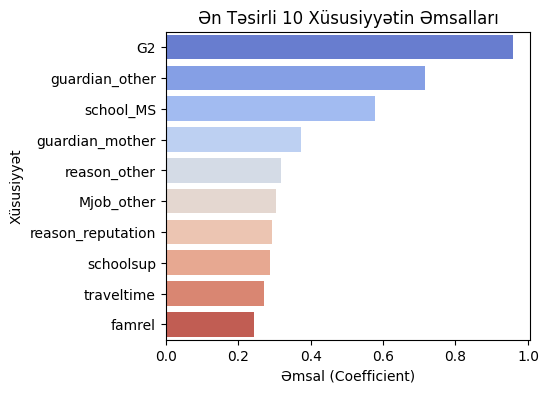

In [55]:
# Əmsallar
coef_df = pd.Series(model.coef_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(16, 4))

# 1. Ən Təsirli Xüsusiyyətlər
plt.subplot(1, 3, 1)
sns.barplot(x=coef_df.values[:10], y=coef_df.index[:10], palette="coolwarm")
plt.title("Ən Təsirli 10 Xüsusiyyətin Əmsalları")
plt.xlabel("Əmsal (Coefficient)")
plt.ylabel("Xüsusiyyət")

Text(0.5, 1.0, 'Həqiqi vs Proqnoz G3')

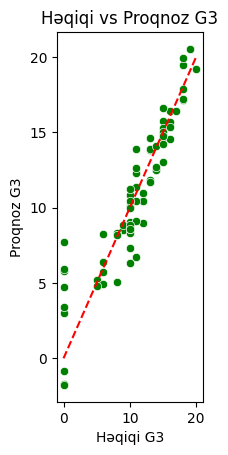

In [56]:
# 2. Həqiqi vs Proqnoz G3
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Həqiqi G3")
plt.ylabel("Proqnoz G3")
plt.title("Həqiqi vs Proqnoz G3")


/tmp/ipython-input-57-1796735093.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g3_corr.values[:10], y=g3_corr.index[:10], palette="viridis")


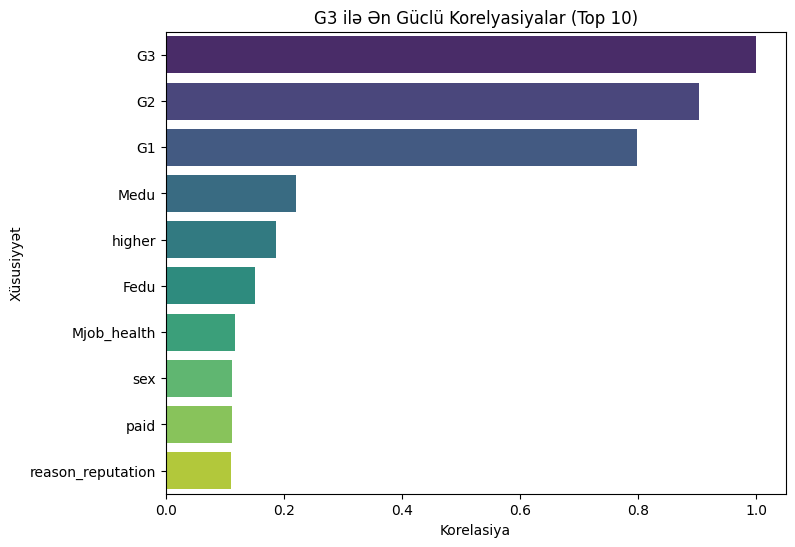

In [57]:
# G3 ilə korelyasiya edən dəyişənlər
g3_corr = df.corr(numeric_only=True)['G3'].sort_values(ascending=False)

# Ən yüksək və mənfi əlaqələri çək (istəyə görə top 10)
plt.figure(figsize=(8, 6))
sns.barplot(x=g3_corr.values[:10], y=g3_corr.index[:10], palette="viridis")
plt.title("G3 ilə Ən Güclü Korelyasiyalar (Top 10)")
plt.xlabel("Korelasiya")
plt.ylabel("Xüsusiyyət")
plt.show()


# Ümumi Təqdimat:
Modelimizin məqsədi şagirdlərin yekun qiyməti olan G3 dəyərini təxmin etmək idi. Ən güclü təsir göstərən dəyişənlər arasında G1, G2 və failures xüsusilə seçilir. Modelin R² = 0.85 olması göstərir ki, modelimiz G3-dəki dəyişkənliyin 85%-ni izah edə bilir ki, bu da yaxşı nəticədir. MAE və RMSE dəyərləri də proqnozların gerçək qiymətlərə yaxın olduğunu göstərir. Nəticələr göstərir ki, əvvəlki dövrlərin qiymətləri və təhsil motivasiyası G3 üzərində əsas faktorlardır.